In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('ggplot')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [110]:
file_train_github = './dataset/train.csv'
file_train_kaggle = ''
file_test_github = './dataset/test.csv'
file_test_kaggle = ''

try:
    orig_train = pd.read_csv(file_train_github)
    orig_test = pd.read_csv(file_test_github)
except:
    orig_train = pd.read_csv(file_train_kaggle)
    orig_test = pd.read_csv(file_test_kaggle)

df = orig_train.copy()
df_test = orig_test.copy()
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
df.shape

(165034, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
df.duplicated(keep=False).sum()

0

In [8]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
                  ..
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Length: 14, dtype: int64

In [9]:
df.CustomerId.nunique()

23221

In [10]:
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [12]:
numerical_cols = df.select_dtypes('number').columns.drop('Exited')
categorical_cols = df.select_dtypes(exclude='number')

,Geography,Gender
0,France,Male
1,France,Male
2,France,Male
3,France,Male
4,Spain,Male
...,...,...
165029,Spain,Female
165030,France,Male
165031,France,Male
165032,Spain,Female


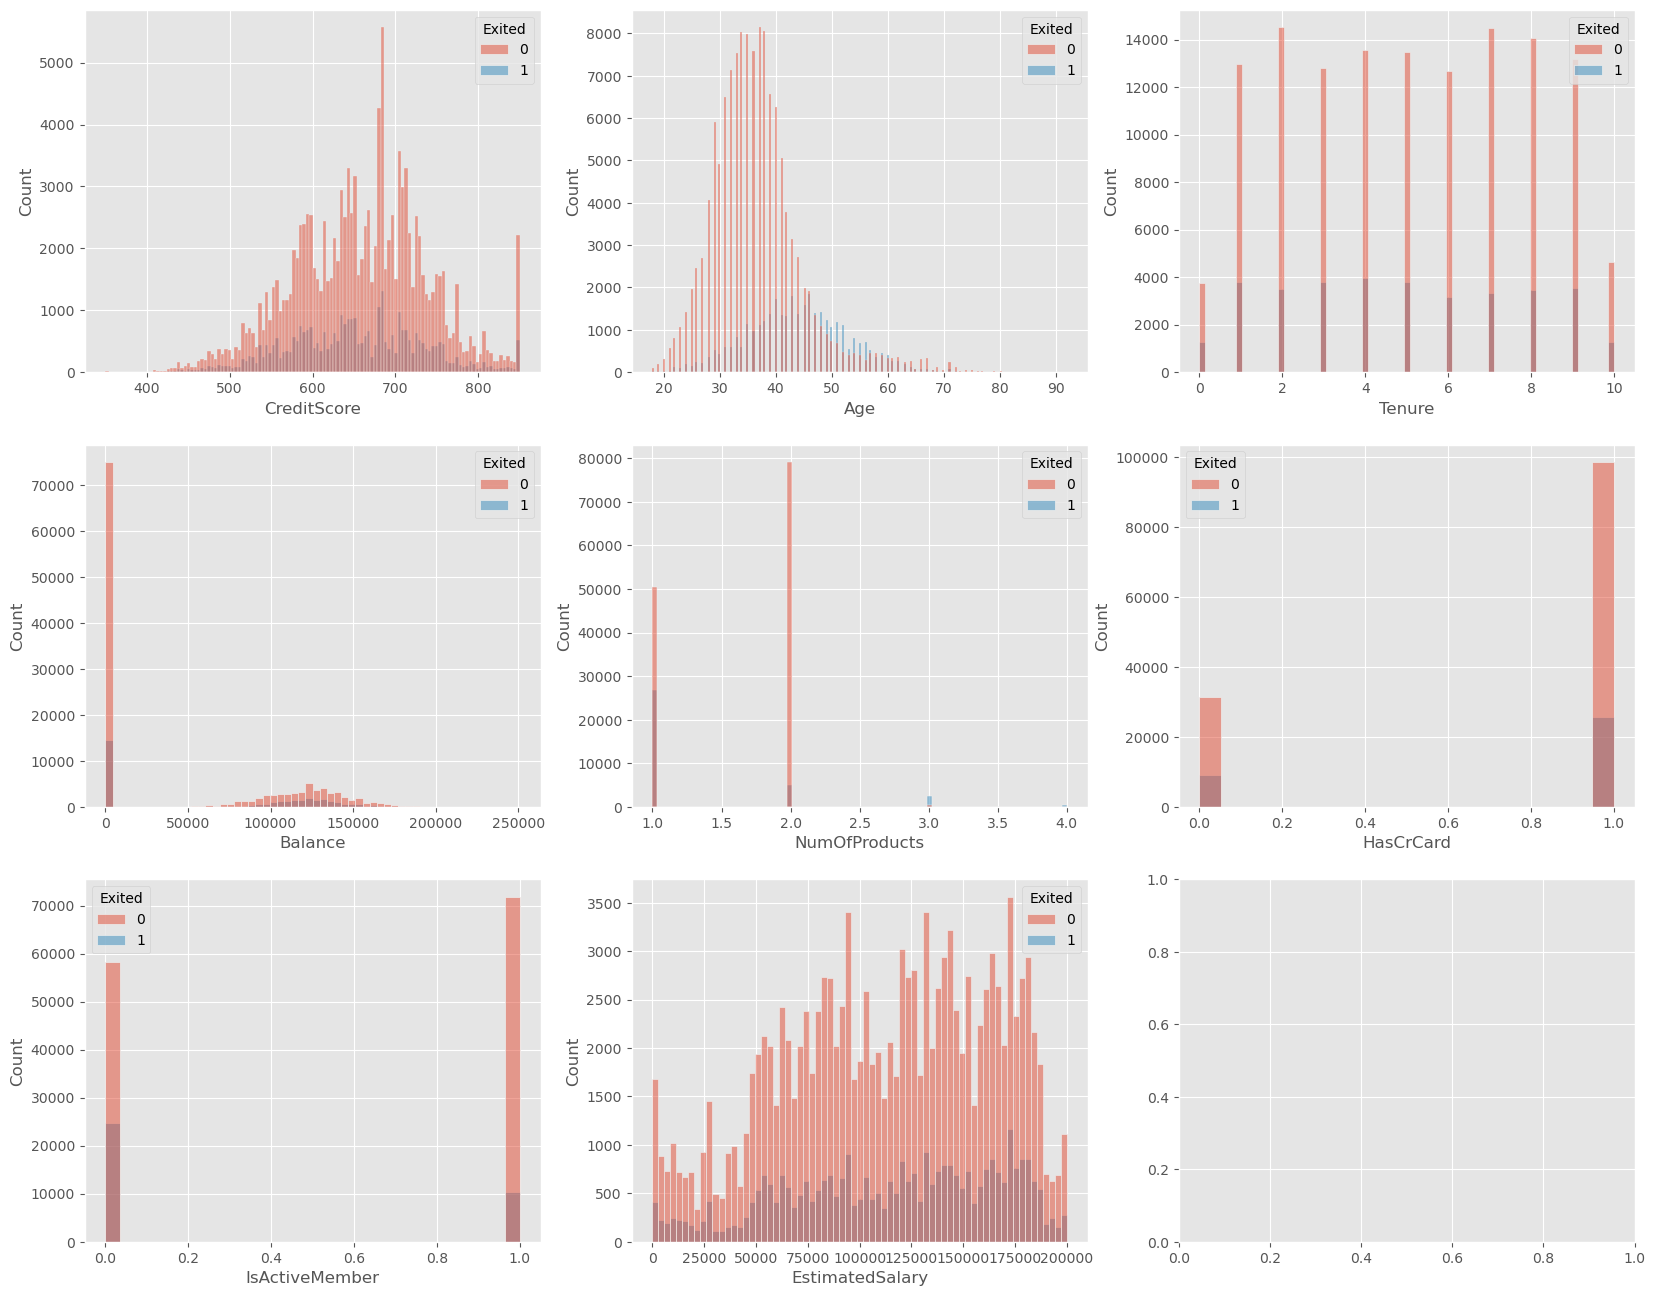

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(20, 16))

for index, col_name in enumerate(numerical_cols):
    sns.histplot(ax=ax.flatten()[index], data=df, x=col_name, hue='Exited', kde=True)

In [72]:
df.CreditScore.skew()

-0.059291219678312086

In [26]:
df.loc[:, ['Geography', 'Gender', 'Exited']]

,Geography,Gender,Exited
0,France,Male,0
1,France,Male,0
2,France,Male,0
3,France,Male,0
4,Spain,Male,0
...,...,...,...
165029,Spain,Female,0
165030,France,Male,0
165031,France,Male,0
165032,Spain,Female,0


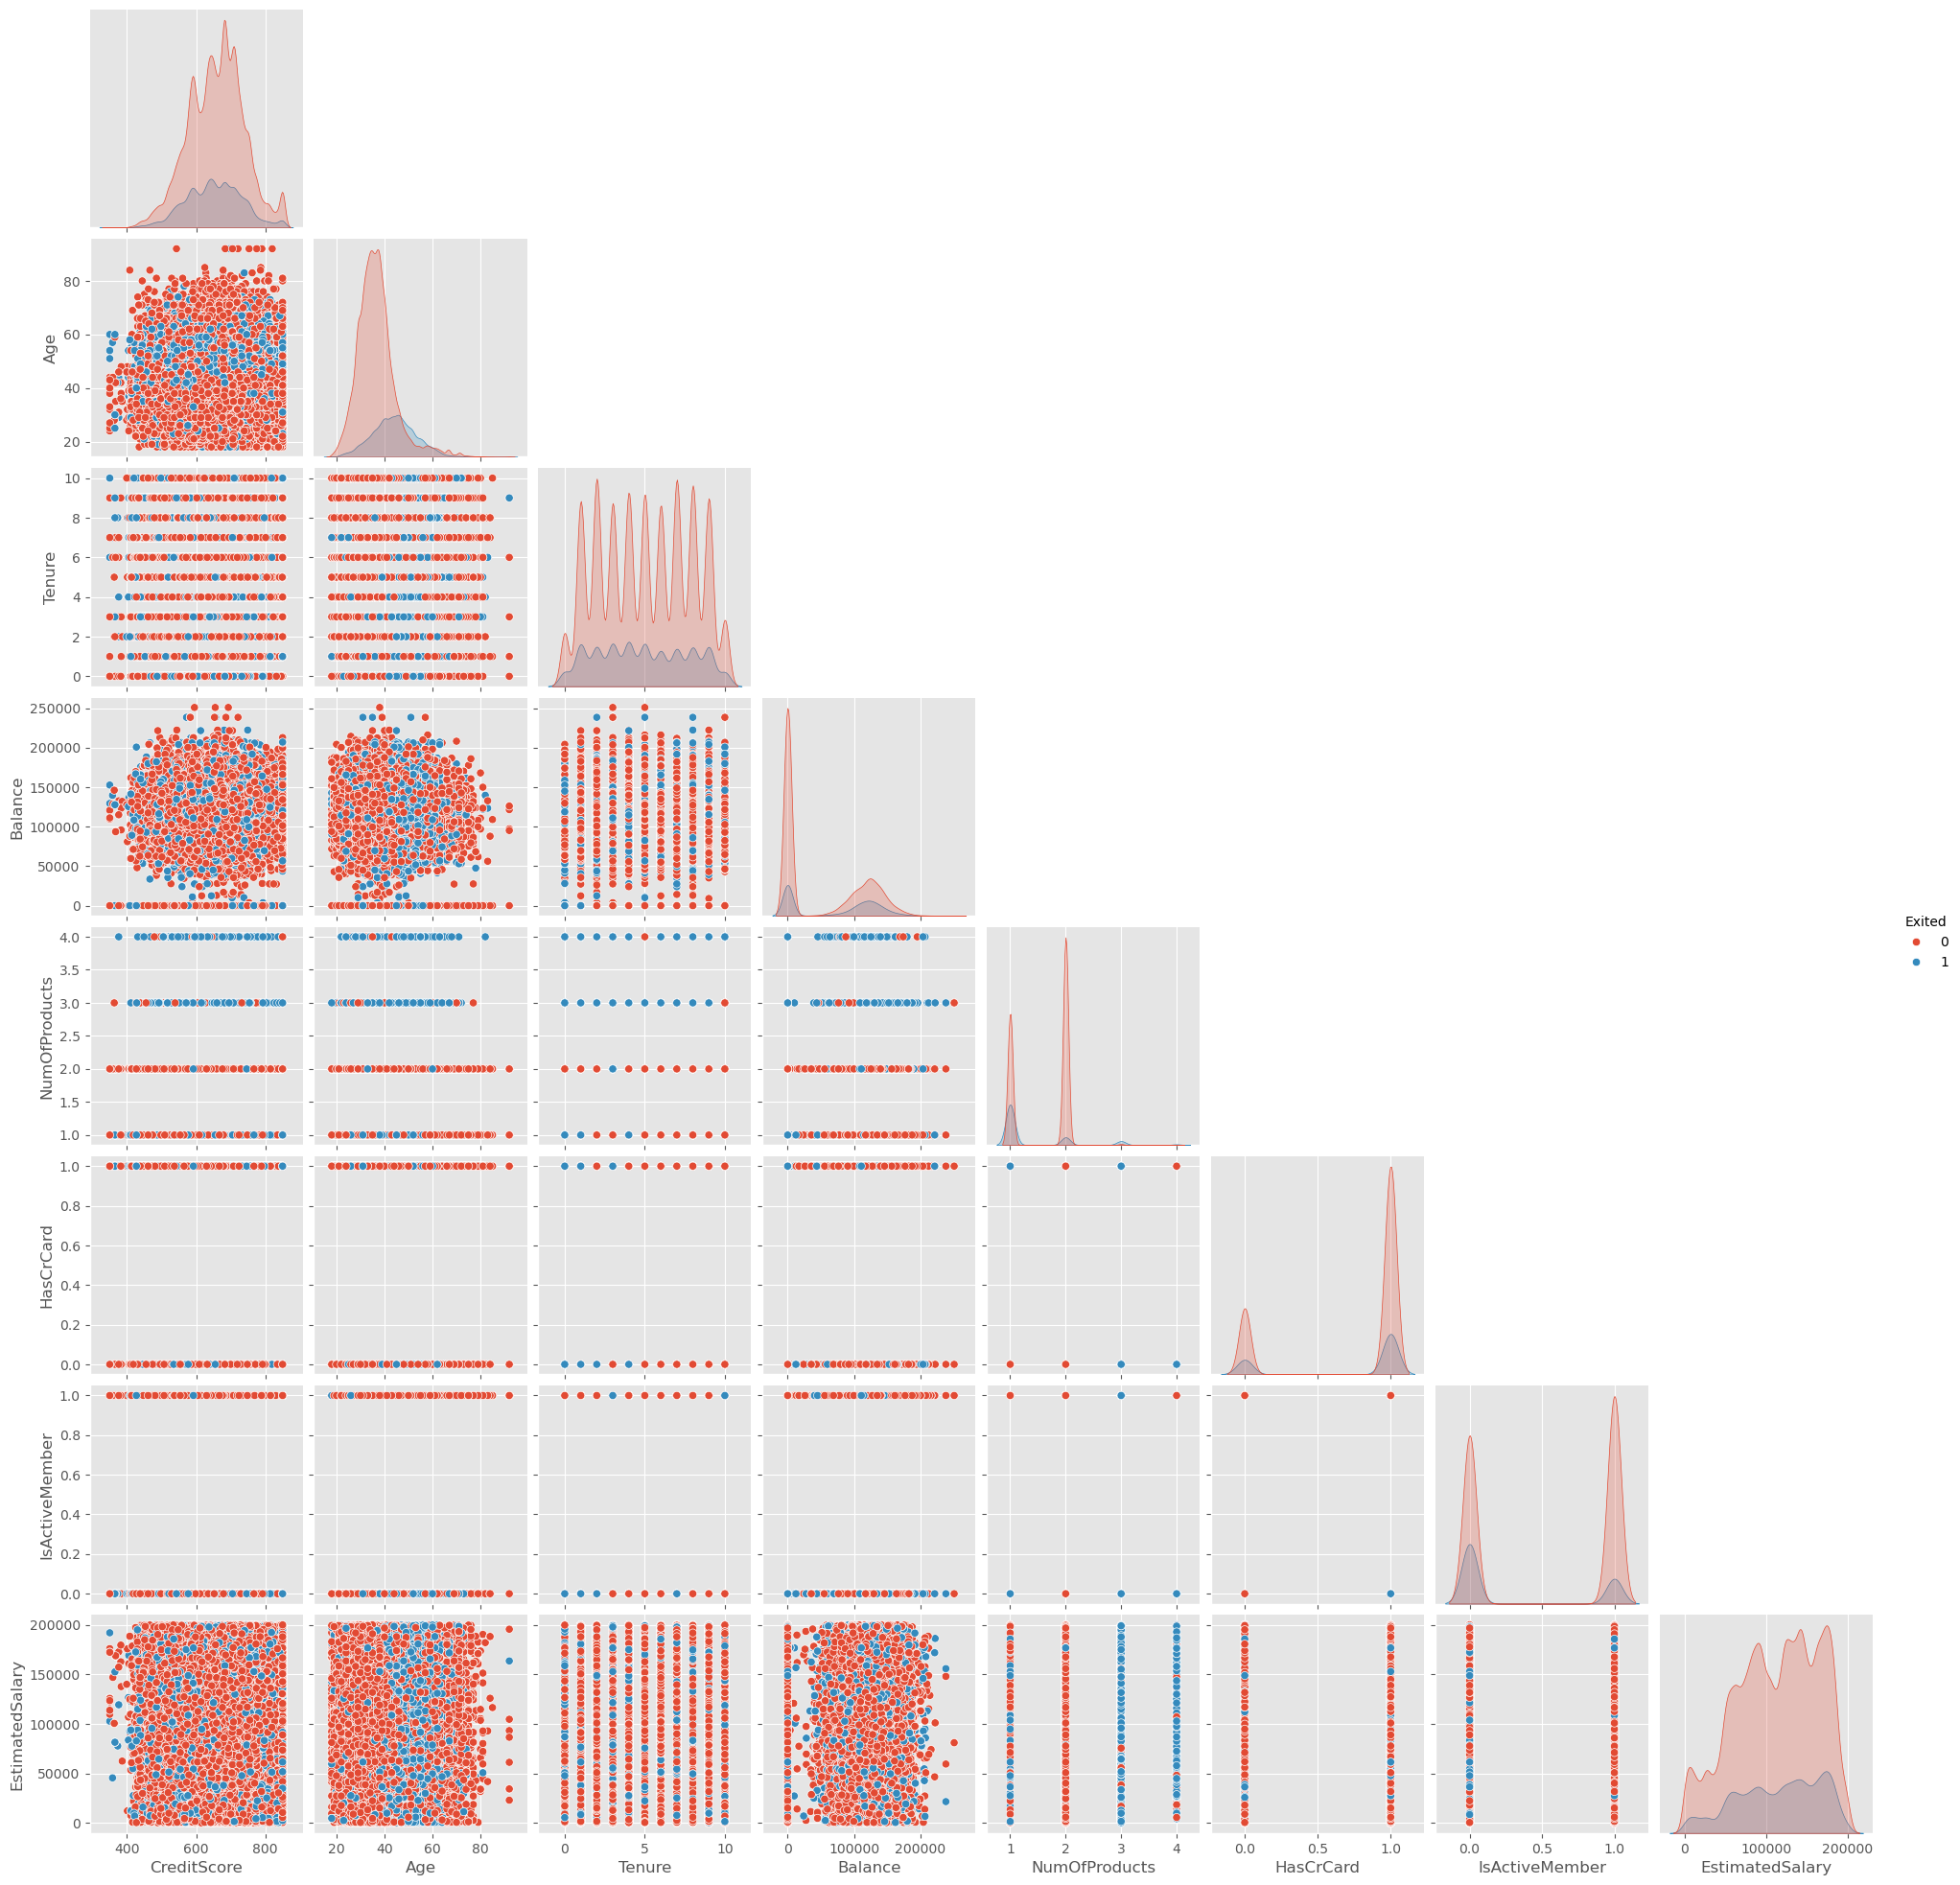

In [34]:
numerical_cols_pairplot = df.select_dtypes('number')
numerical_cols_pairplot

sns.pairplot(data=numerical_cols_pairplot, corner=True, hue='Exited')

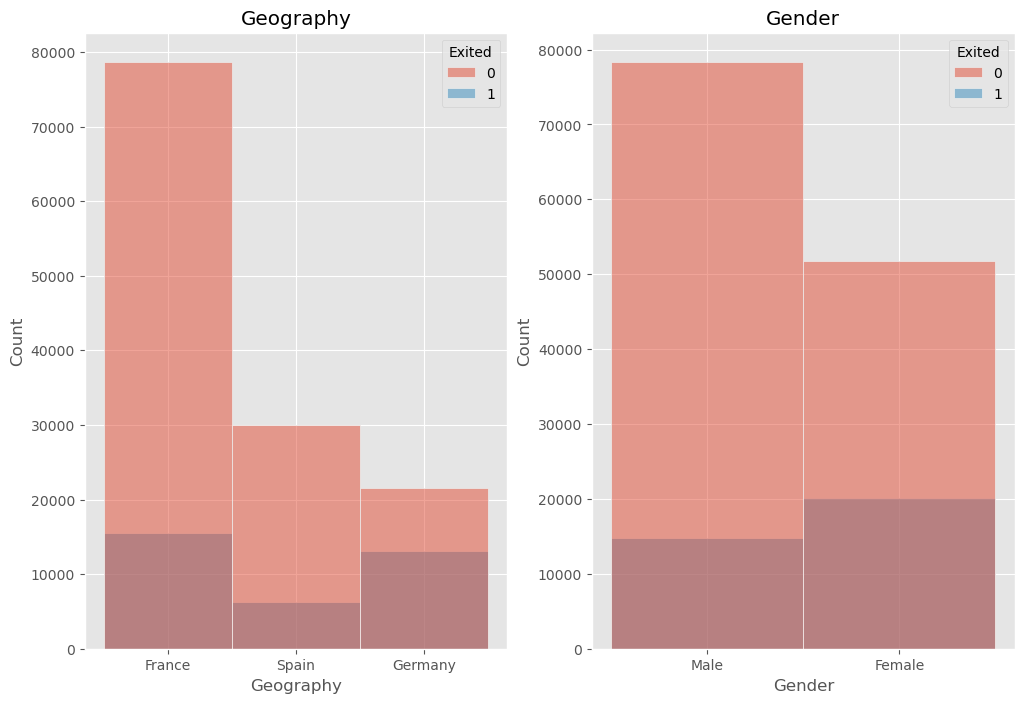

In [68]:
categorical_cols_pairplot = df.loc[:, ['Geography', 'Gender', 'Exited']]
categorical_cols_pairplot

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for index, col_name in enumerate(['Geography', 'Gender']):
    count = df[col_name].value_counts()
    sns.histplot(data=df, x=col_name, hue='Exited', ax=ax.flatten()[index])
    ax.flatten()[index].set_title(col_name)

In [62]:
df[col_name].value_counts().values

array([93150, 71884])

In [93]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [69]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [103]:
robust_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
pass_through = ['NumOfProducts']

In [112]:
df_test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [118]:
X_train = df.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y_train = df['Exited']
X_test = df_test.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [124]:
ct = ColumnTransformer([
    ('robust_scaler', RobustScaler(), robust_cols),
    ('one_hot_encode', OneHotEncoder(sparse=True, handle_unknown='ignore'), cat_cols),
    ('not_transformed', 'passthrough', pass_through)
])

pipe = Pipeline([
    ('preprocessing', ct),
    ('model', RandomForestClassifier(n_estimators=500, min_samples_split=2, random_state=0, ))
])

pipe.fit(X_train, y_train)

/Users/tim/miniforge3/envs/for_ml/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=True),
                                                  ['Geography', 'Gender',
                                                   'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('not_transformed',
                                                  'passthrough',
                                                  ['NumOfProducts'])])),
                ('model', RandomForestClassifier(n_estimators=500))])

In [127]:
prediction = pipe.predict_proba(X_test)


array([[0.97 , 0.03 ],
       [0.072, 0.928],
       [1.   , 0.   ],
       ...,
       [1.   , 0.   ],
       [0.834, 0.166],
       [0.86 , 0.14 ]])

In [132]:
submission = pd.DataFrame(data=prediction[:, 1], columns=[
                          'Exited'], index=X_test.index)
submission

,Exited
0,0.030000
1,0.928000
2,0.000000
3,0.150333
4,0.328000
...,...
110018,0.062000
110019,0.038000
110020,0.000000
110021,0.166000
